# Hadoop

## O que é ?
Hadoop é um framework em código aberto para armazenamento e processamento distribuídos de grandes conjuntos de dados em hardware simples.
![Hadoop](https://s3-sa-east-1.amazonaws.com/lcpi/e6813617-b661-41ae-83c5-916651ce42e9.png)

## História
Motivado a construir um buscador complexo, que funcione na escala da web, indexando bilhões de páginas, Doug Cutting resolveu se dedicar ao desafio iniciando seu projeto Nutch junto com Mike Cafarella, mas enfrentou alguns problemas com escalabilidade.

Hadoop era o nome do elefante amarelo de pelúcia do filho de Doug.

Um artigo publicado em 2003 pelo Google abriu caminho para que a equipe do Nutch criasse uma implementação open source do GFS (Google File System).

Em 2004 o Google publica o clássico artigo descrevendo seu framework MapReduce para atender às necessidades de processamento de várias máquinas das tarefas de rastreamento e índice.

## Onde usar Hadoop?
- Análise de Dados
- Data Warehouse
- Data Lake
- Processamento de logs
- Muito mais!

## Características
- Baixo custo 
- Flexibilidade de armazenamento
- OpenSource
- Tolerante a falha
- Análise complexa de dados
- Escalabilidade

## Componentes
- Hadoop Common
- HDFS (Hadoop File System)
- MapReduce
- Yarn

## Replicação
A alta disponibilidade de dados no Hadoop é possível devido à replicação implícita de dados em um cluster Hadoop. Um bloco de arquivo é replicado em vários "nós de dados" com base no "fator de replicação" do cluster Hadoop, que pode ser 1, 2, 3 ...

Um fator de replicação 1 indica que um bloco de arquivos residirá em um único "nó de dados". Um fator de replicação 2 indica que um bloco de arquivos residirá em dois "nós de dados", no mesmo rack ou em um fisicamente a milhares de quilômetros de distância; etc.

## Arquitetura
O Hadoop é baseado em uma arquitetura Master/Slave. Um cluster Hadoop possui um único nó Master e vários nós Slaves.

### Master
É responsável por armazenar os metadados associados aos seus nós slaves no rack do qual faz parte.

O nó principal é responsável por manter o status de seus nós slaves, estabelecendo um deles como um nó passivo, que se tornará um nó principal se, por qualquer motivo, estiver bloqueado. Um dos problemas do Hadoop é que às vezes o nó passivo não é sincronizado com o nó principal original , assumindo suas funções no processo.

### Slave
É o nó encarregado de armazenar as informações que estão sendo processadas pelo nó master em um momento específico.

## Hadoop Common
Também conhecido como Hadoop Core, é a coleção de utilitários comuns e bibliotecas (JAR) que oferecem suporte a outros módulos Hadoop, sendo assim vital para sua inicialização e funcionamento.



# HDFS

Hadoop Distributed File System (HDFS) é o sistema de armazenamento distribuído utilizado por aplicações Hadoop. O HDFS quebra os arquivos em blocos de dados (128 MB por padrão), cria réplicas (três por padrão) e as ditribui no cluster, permitindo assim computações extremamente rápidas em arquivos pequenos e em máquinas distintas. HDFS permite escalabilidade e tolerança a falhas

## Componentes

- NameNode: Gerencia o namespace do sistema de arquivos do Hadoop.
- DataNode: Armazena os blocos de dados em um nó.

### NameNode
- Armazena metadados.
- Usa cache em RAM para acesso mais rápido ao metadado.
- Não armazena dados.
- Apenas 1 ativo por cluster.
- Ponto único de falha sem HA (Alta Disponibilidade).

Em resumo, o NameNode faz a gestão do HDFS em um nó: mantém metadados, logs, adiciona, encontra, exclui e copia arquivos. 

### DataNode
- Armazena os dados no HDFS.
- Atende solicitações de leitura e gravação dos clientes ou NameNode.
- Responsável por criar, excluir e replicar blocos de dados.
- Reportar status para o NameNode (heartbeat).
- Em caso de falta de report o nó é desativado pelo NameNode.
- Totalmente dependente do NameNode.

Em resumo, o DataNode mantém dados e replica blocos.




## Prática!
### Criar um diretório no HDFS

    hdfs dfs -mkdir /user/cloudera/aula

### Listar o conteúdo do diretório do HDFS

    hdfs dfs -ls /user/cloudera/aula

### Inserir arquivo no HDFS a partir do FileSystem
1. crie um arquivo
    
    vim hadoop.txt

    **sair do vim:** esc + :wq  


2. Mova para o Hadoop

    hdfs dfs -put hadoop.txt /user/cloudera/aula  
    hdfs dfs -ls /user/cloudera/aula



### Visualizar conteúdo do arquivo no HDFS

    hdfs dfs -cat /user/cloudera/aula/hadoop.txt
    hdfs dfs -tail /user/cloudera/aula/hadoop.txt

### Mover arquivo dentro do HDFS

    hdfs dfs -mv /user/cloudera/aula/hadoop.txt /user/cloudera/

### Copiar arquivo dentro do HDFS
    
    hdfs dfs -cp /user/cloudera/hadoop.txt /user/cloudera/aula

### Remover arquivo do HDFS

    hdfs dfs -rm /user/cloudera/aula/hadoop.txt

### Copiar arquivo do HDFS para o FileSystem

    hdfs dfs -get /user/cloudera/hadoop.txt /tmp/

### Localização do blocos no HDFS

    hdfs fsck /user/cloudera/hadoop.txt  -blocks -files -locations

### Aumentar quantidade de réplicas

    hdfs dfs -setrep 2 /user/cloudera/hadoop.txt



# Interface Web


## Overview
~~~
http://quickstart.cloudera:50070
~~~
![Overview](https://s3-sa-east-1.amazonaws.com/lcpi/9197b966-1c13-4e45-9b19-78dd366f4c9a.JPG)

## Hue
~~~
http://quickstart.cloudera:8888

user: cloudera
password: cloudera
~~~

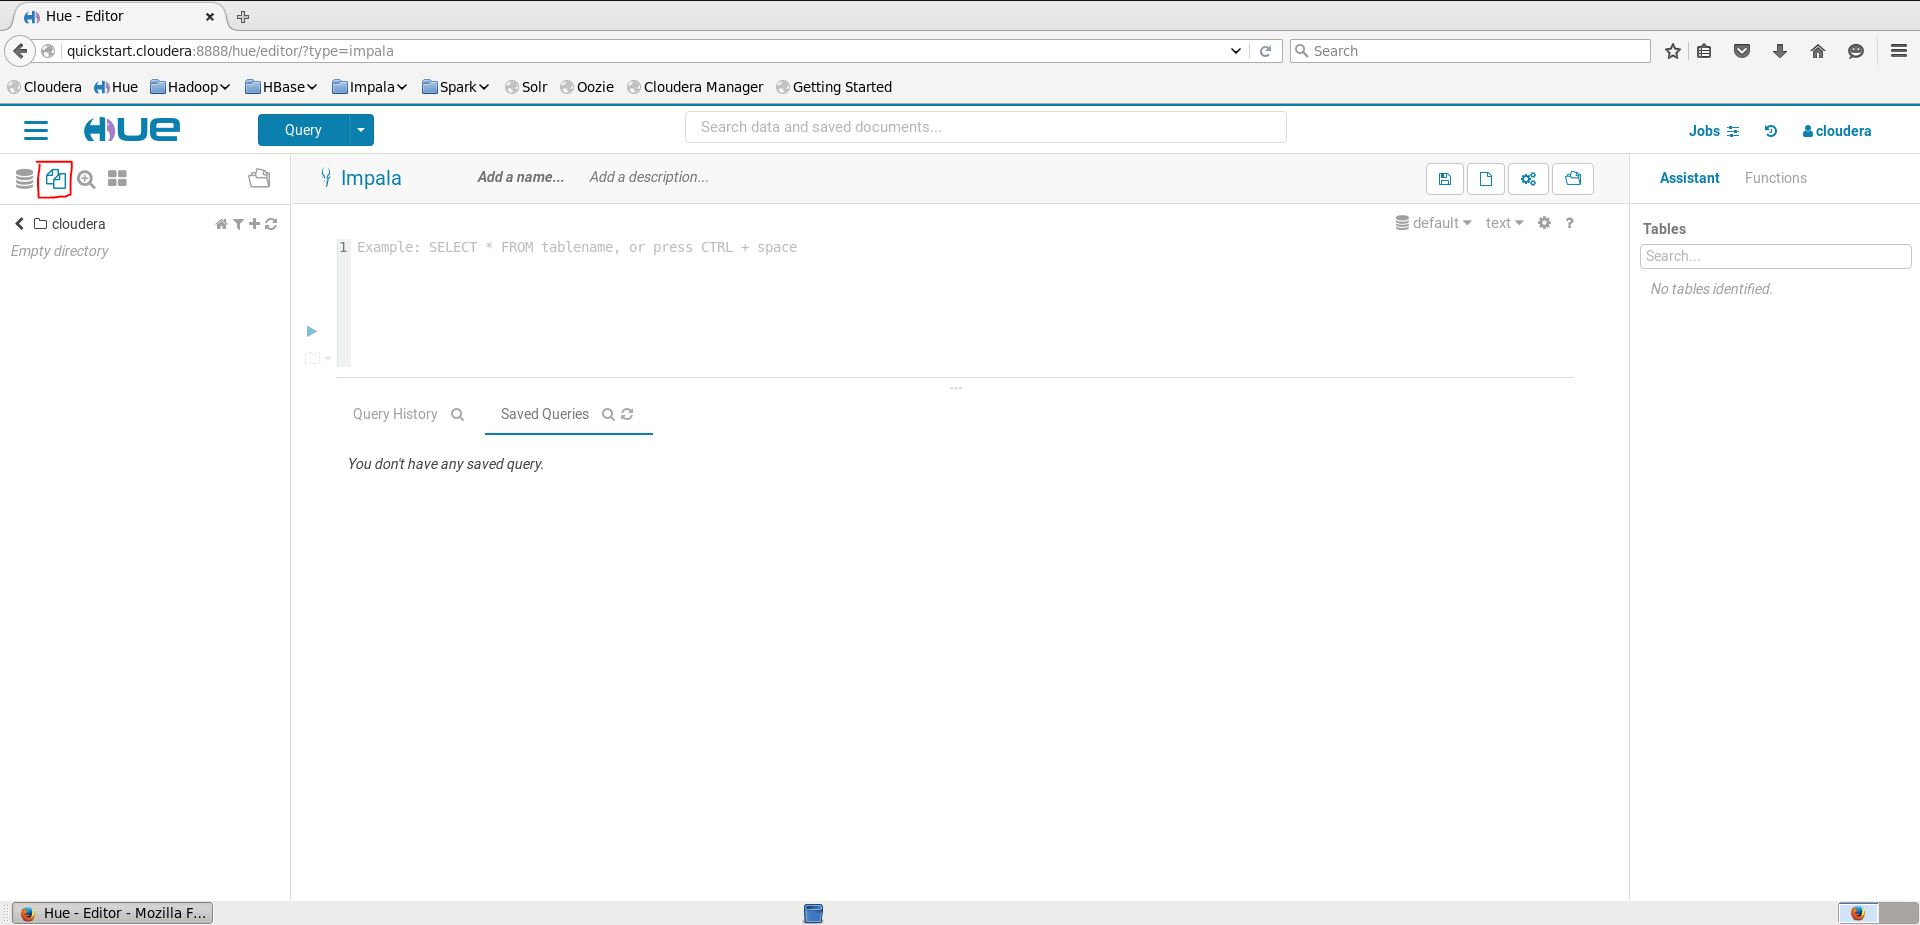


# MapReduce


## Exemplo

Considere uma biblioteca num prédio de vários andares e você precisa contar todos os livros. **Qual a melhor abordagem?**



## Teoria

O Hadoop MapReduce é um modelo de programação para criação de aplicações processam rapidamente vastas quantidades de dados em paralelo através de grandes clusters de computadores comuns.

O código ou programa a ser executado, é transportado até o local do dado, executando tarefas independentes em cada bloco de dado (Map), e depois são consolidados gerando a resposta do processamento (Reduce).

Estrutura de uma aplicação MapReduce.

- Map: Atua exclusivamente sobre um conjunto de entrada com chaves e valores, produzindo uma lista de chaves e valores.
- Reduce: Atua sobre os valores intermediários produzidos pelo map para, normalmente, agrupar os valores e produzir uma saída.

O processo, de forma simplificada:

- Dados são divididos em blocos
- Divisão de problemas grandes e/ou complexos em pequenas tarefas
- Mapeamento é executado em paralelo nos nós
- Apenas quando o Mapeamento é encerrado, redução inicia, também em paralelo
- Fase intermediária: Shuffle (distribui as saídas dos mappers para a execução do reducer)
- Existem tarefa que requerem apenas a etapa de Mapeamento.


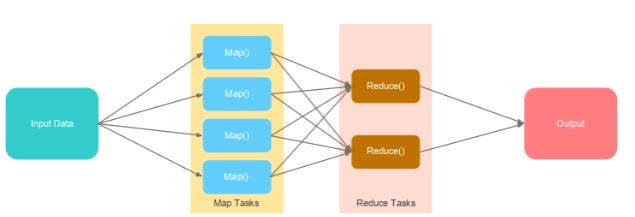




## Map
Atua exclusivamente sobre um conjunto de entrada com chaves e valores,
produzindo uma lista de chaves e valores

Características:
- Ponto de partida
- Recebe cada registro dos dados de entrada como pares de chave/valor
- Cada Mapper é independente um do outro, permitindo paralelismo e re-execuções de tarefas
- Hadoop cria tarefas de Mapper para cada bloco de dados HDFS dos dados de entrada.
- Produz uma lista de chave/valor

## Reduce
Atua sobre os valores intermediários produzidos pelo map para, normalmente, agrupar os valores e produzir uma saída.

Características:
- Responsável por agregações, filtros e combinações diversas nos dados de entrada
- Executa uma função de reduce por vez
- Shuffle: Distribui as saídas dos mappers para a execução do reducer
- Sort: Ordena os registros chave/valor, agrupando pela chave
- Reduce: Envia os conjuntos chave/valor agrupados, filtrados ou combinados no formato de saída

## Pontos Positivos
- Escalável
- Tolerante a falhas
- Disponibilidade
- Confiável
- Usa conceito de chave/valor
- Não cria gargalos na rede pois os dados não trafegam (processamento no nó)

## Pontos Negativos
MapReduce não é indicado para:
- Consultas que necessitam de baixa latência
- Sistemas real-time
- Consultas em um website
- Processamento de pequenas tarefas
- Overhead para gerenciamento das tarefas

## Prática!

1. Download

    https://s3-sa-east-1.amazonaws.com/lcpi/c6729d53-18cb-4f16-b1b7-e0217c57649a.zip


2. Criar um diretório no HDFS

    hdfs dfs -mkdir /user/cloudera/input


3. Inserir arquivo .txt no HDFS a partir do FileSystem

    hdfs dfs -put ~/Documents/mapreduce-master/texto.csv /user/cloudera/input

### Executando MapReduce

    hadoop jar wordcount.jar WordCount /user/cloudera/input /user/cloudera/output

### Verificar Job

    http://quickstart.cloudera:8088


4. Ver lista os arquivos no diretório no HDFS

    hdfs dfs -ls /user/cloudera/output

5. Verificando o conteúdo do arquivo

    hdfs dfs -cat /user/cloudera/output/part-r-00000

# Yarn


O YARN (Yet Another Resource Negotiator) foi introduzido no Hadoop versão 2.0 no ano de 2012 pelo Yahoo e Hortonworks. A idéia básica por trás do YARN é aliviar o MapReduce, assumindo a responsabilidade do Gerenciamento de Recursos e do Agendamento de Tarefas. O YARN começou a dar ao Hadoop a capacidade de executar tarefas não MapReduce na estrutura do Hadoop. 

Características:
- Permite que vários aplicativos sejam executados simultaneamente no mesmo cluster compartilhado.
- Permite que os aplicativos negociem recursos com base na necessidade.

## Arquitetura
Duas principais funcionalidades: gerenciamento de recursos e agendamento/monitoramento de tarefas.  
Componentes:
- ResourceManager: um por cluster (orquestrador)
    - ApplicationManager: gerencia atividades, otimização, distribuição de recursos.
- NodeManager: um por nó, responsável pela execução dos Jobs.
- Aplication Master: Distribui tarefas aos containers.
- Container: mantém as tarefas.

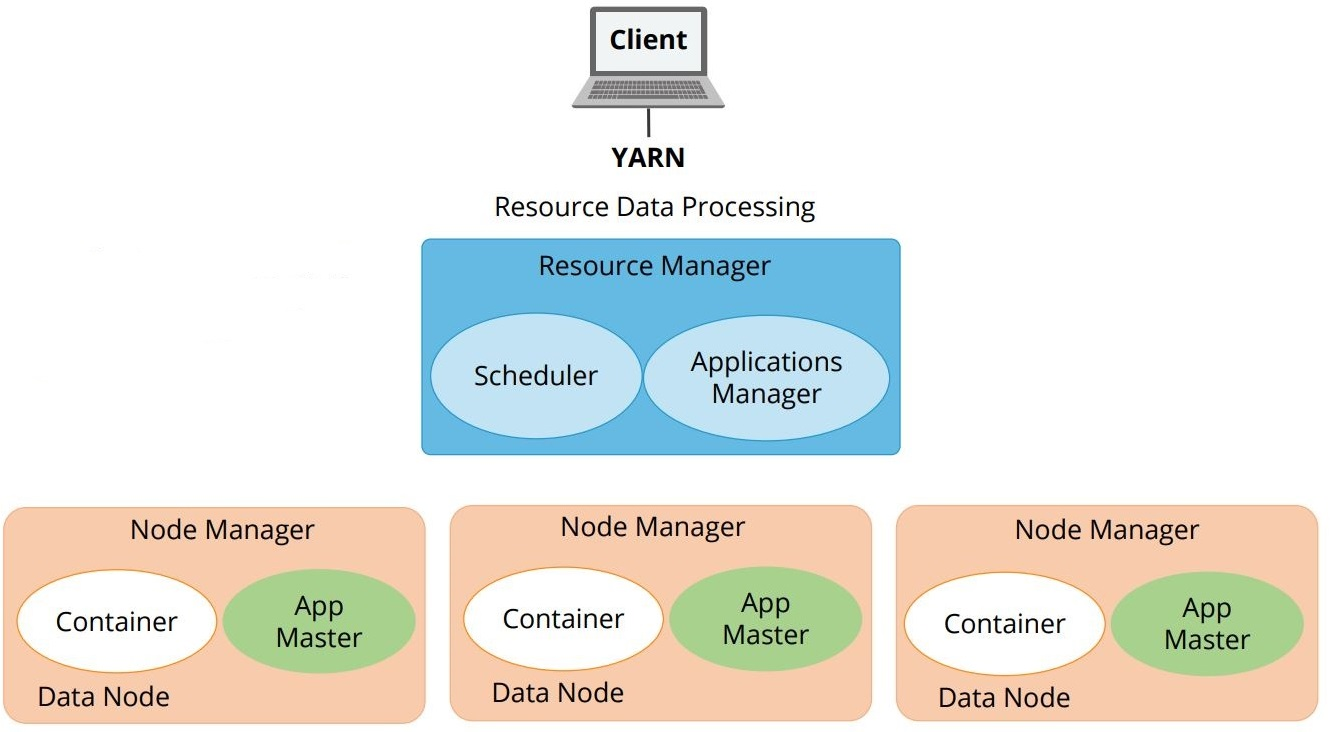



## ResourceManager
- Possui um agendador de nível de cluster que tem responsabilidade pela alocação de recursos para todas as tarefas em execução, de acordo com as solicitações do ApplicationManager.
- A principal responsabilidade do ResourceManager é alocar recursos para os aplicativos.
- Não é responsável pelo rastreamento do status de uma aplicação ou tarefas de monitoramento.
- Não garante o reinício/balanceamento de tarefas no caso de falha no aplicativo ou no hardware.

## NodeManager
- Nó Slave, é executado nos worker nodes.
- Gerencia o ciclo de vida do container e monitora o uso de recursos.
- Executa o container com base na capacidade do nó, que é calculada com base na memória instalada e no número de núcleos da CPU.
- Envia um sinal ao para atualizar seu status de integridadeResourceManager.
- Envia o status para ResourceManager, que pode ser o status do nó ou o status das tarefas executadas.

## ApplicationMaster
- Biblioteca de aplicativos que gerencia cada instância de um aplicativo que é executado dentro de YARN.
- Responsável por negociar recursos do ResourceManager na submissão do aplicativo, como memória e CPU.
- Responsável por monitorar o status de um aplicativo e monitorar os processos de aplicativos em coordenação com o NodeManager.

## Container
- Pacote lógico de recursos em termos de memória, CPU, disco, etc...
- Vinculado a um nó específico
- ResourceManager aloca dinamicamente recursos como containeres
- Um container concede direitos a um ApplicationMaster para usar uma quantidade específica de recursos de um host específico
- ApplicationMaster é considerado como o primeiro container de um aplicativo e gerência a execução da lógica do aplicativo em containers alocados




## Prática!

### Verificar Jobs

    http://quickstart.cloudera:8088/


### Comandos

Os comandos YARN são invocados usando o script bin/yarn no pacote Hadoop

A sintaxe básica para o comando:

    yarn [--config confdir] COMMAND COMMAND_OPTIONS

### Application 

Lista, obtem status e mata um aplicativo.

    yarn application -list
    yarn application -status application_1629465621304_0009
    yarn application -kill application_1629465621304_0012

### Node

Lista e obtem status dos nós.

    yarn node -list
    yarn node -all -list
    yarn node -status quickstart.cloudera:38116

### Logs

Obtem logs de um aplicativo já finalizado.

    yarn logs -applicationId application_1629465621304_0014

### Classpath

Retorna o valor do classpath atual.

    yarn classpath
 
### Version 
Retorna a versão atual do Cluster Yarn.

    yarn version

### Top 

Fornece um resumo de informações.

    yarn top